##References
[1] Z. Zhang, H. Zhao, and R. Wang, “Machine Reading Comprehension: The Role of Contextualized Language Models and Beyond,” CoRR, vol. abs/2005.06249, 2020, [Online]. Available: https://arxiv.org/abs/2005.06249 

[2] Y. Liu et al., “RoBERTa: A Robustly Optimized BERT Pretraining Approach,” CoRR, vol. abs/1907.11692, 2019, [Online]. Available: http://arxiv.org/abs/1907.11692 

[3] J. Ni, T. Young, V. Pandelea, F. Xue, V. Adiga, and E. Cambria, “Recent Advances in Deep Learning Based Dialogue Systems: A Systematic Survey,” CoRR, vol. abs/2105.04387, 2021, [Online]. Available: https://arxiv.org/abs/2105.04387

[4] P. Dwivedi, “NLP - building a question answering model,” Medium, 11-Jul-2018. [Online]. Available: https://towardsdatascience.com/nlp-building-a-question-answering-model-ed0529a68c54. [Accessed: 15-Apr-2022].

[5] P. Rajpurkar, J. Zhang, K. Lopyrev, and P. Liang, “SQuAD: 100,000+ Questions for Machine Comprehension of Text,” arXiv e-prints, p. earXiv:1606.05250, 2016.

[6] https://towardsdatascience.com/question-answering-with-a-fine-tuned-bert-bc4dafd45626

[7]https://towardsdatascience.com/how-to-apply-transformers-to-any-length-of-text-a5601410af7f

https://docs.google.com/document/d/1GK8YMhgOiYgy6CW2nGHvyN1LWDCAaarK/edit?usp=sharing&ouid=106070442521992905253&rtpof=true&sd=true

Squad V2 dataset card: https://huggingface.co/datasets/squad_v2

Huggingface documentation: https://huggingface.co/docs/datasets/tutorial

Transformers library documentation: https://huggingface.co/docs/transformers/index

Deepset roberta base model: https://huggingface.co/deepset/roberta-base-squad2

ref : https://www.analyticsvidhya.com/blog/2021/11/end-to-end-question-answering-system-using-nlp-and-squad-dataset/


ref : https://blog.paperspace.com/how-to-train-question-answering-machine-learning-models/

ref: https://paperswithcode.com/sota/question-answering-on-squad20

ref : https://blog.seeburger.com/natural-language-question-answering-systems-get-quick-answers-to-concrete-questions/


code ref:

 https://github.com/aashaar/Question-Answering-System-NLP

https://github.com/sainikhithamadduri/Question-Answering-System-NLP

https://github.com/habildamania/Question-Answering-System


https://github.com/pradeepdev-1995/Question-answering-python

https://github.com/upasana05ghosh/Question-Answering-System

https://github.com/kushalj001/pytorch-question-answering/blob/master/0.%20NLP%20Preprocessing%20Pipeline%20for%20QA.ipynb

In [ ]:
!pip install datasets
!pip install transformers

     |████████████████████████████████| 3.8 MB 4.4 MB/s 
     |████████████████████████████████| 895 kB 40.9 MB/s 
     |████████████████████████████████| 596 kB 41.5 MB/s 
     |████████████████████████████████| 6.5 MB 38.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
# get transformers then bert along with other libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install transformers
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

     |████████████████████████████████| 4.0 MB 4.0 MB/s 
     |████████████████████████████████| 596 kB 32.4 MB/s 
     |████████████████████████████████| 77 kB 5.4 MB/s 
     |████████████████████████████████| 895 kB 59.4 MB/s 
     |████████████████████████████████| 6.6 MB 34.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
#get dataset 
dataset = pd.read_json('http://downloads.cs.stanford.edu/nlp/data/coqa/coqa-train-v1.0.json')
dataset.head()

,version,data
0,1,"{'source': 'wikipedia', 'id': '3zotghdk5ibi9ce..."
1,1,"{'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7..."
2,1,"{'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn..."
3,1,"{'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya..."
4,1,"{'source': 'gutenberg', 'id': '3urfvvm165iantk..."


In [4]:
#delete unnecessary column
del dataset["version"]

In [5]:
# get ready to save only required columns into a new csv file
columns = ["text","question","answer"]

Final_list = []
for index, row in dataset.iterrows():
    for i in range(len(row["data"]["questions"])):
        Temporary = []
#append data to respective columns then compile
        Temporary.append(row["data"]["story"])
        Temporary.append(row["data"]["questions"][i]["input_text"])
        Temporary.append(row["data"]["answers"][i]["input_text"])
        Final_list.append(Temporary)
# store compiled data frame
new = pd.DataFrame(Final_list, columns=columns) 

In [6]:
#store processed data to new csv file
new.to_csv("new_data.csv", index=False)

In [7]:
# read dataset
data = pd.read_csv("new_data.csv")
data.head()

,text,question,answer
0,"The Vatican Apostolic Library (), more commonl...",When was the Vat formally opened?,It was formally established in 1475
1,"The Vatican Apostolic Library (), more commonl...",what is the library for?,research
2,"The Vatican Apostolic Library (), more commonl...",for what subjects?,"history, and law"
3,"The Vatican Apostolic Library (), more commonl...",and?,"philosophy, science and theology"
4,"The Vatican Apostolic Library (), more commonl...",what was started in 2014?,a project


In [8]:
print("total questions & answers: ", len(data))

total questions & answers:  108647


STORING ALBERT PRETRAINED MODEL

In [51]:
#get the model and tokenizer 
% pip install sentencepiece
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

tokenizer = AutoTokenizer.from_pretrained("ktrapeznikov/albert-xlarge-v2-squad-v2")
model = AutoModelForQuestionAnswering.from_pretrained("ktrapeznikov/albert-xlarge-v2-squad-v2")

In [52]:
random_num = np.random.randint(0,len(data))
question = data["question"][random_num]
text = data["text"][random_num]

In [53]:
# tokenize question and text
input_ids = tokenizer.encode(question, text)

In [54]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)

for token, id in zip(tokens, input_ids):
    print('{:8}{:8,}'.format(token,id))

[CLS]          2
▁last        236
▁name        204
▁             13
?             60
[SEP]          3
▁chapter   1,260
▁xiii     17,430
▁buried    2,253
▁alive     2,481
▁at           35
▁the          14
▁moment      688
▁when         76
▁skip     12,532
▁miller    3,022
▁knocked   5,563
▁away        229
▁the          14
▁jo        2,640
ist          702
▁which        56
▁supported   1,827
▁the          14
▁timber    5,108
s             18
▁at           35
▁the          14
▁top         371
▁of           16
▁the          14
▁tunnel    3,485
,             15
▁fred      4,250
▁had          41
▁stoop    22,150
ed            69
▁to           20
▁pick      2,036
▁up           71
▁his          33
▁shovel   20,108
,             15
▁and          17
▁this         48
▁position     649
▁saved     4,377
▁him          61
▁from         37
▁being       142
▁instantly   6,064
▁killed      841
.              9
▁one          53
▁end         241
▁of           16
▁the          14
▁sho       5,799
ring     

In [55]:
#segmenting tokens in question and text 
idx = input_ids.index(tokenizer.sep_token_id)
print(idx)

#frequency of tokens in segment question
segment_question = idx+1
print(segment_question)

#frequency of tokens in segment text
segment_text = len(input_ids) - segment_question
print(segment_text)

segment_ids = [0]*segment_question + [1]*segment_text
print(segment_ids)

assert len(segment_ids) == len(input_ids)

5
6
373
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [41]:

# Feed the data to the model
output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))


In [43]:
#generate start and end scores of tokens in answer
start = torch.argmax(output.start_logits)
end = torch.argmax(output.end_logits)


In [44]:
if end >= start:
    answer = " ".join(tokens[start:end+1])
else:
    print("Try another question!")

In [45]:

start_scores = output.start_logits.detach().numpy().flatten()
end_scores = output.end_logits.detach().numpy().flatten()

token_labels = []
for i, token in enumerate(tokens):
    token_labels.append("{}-{}".format(token,i))

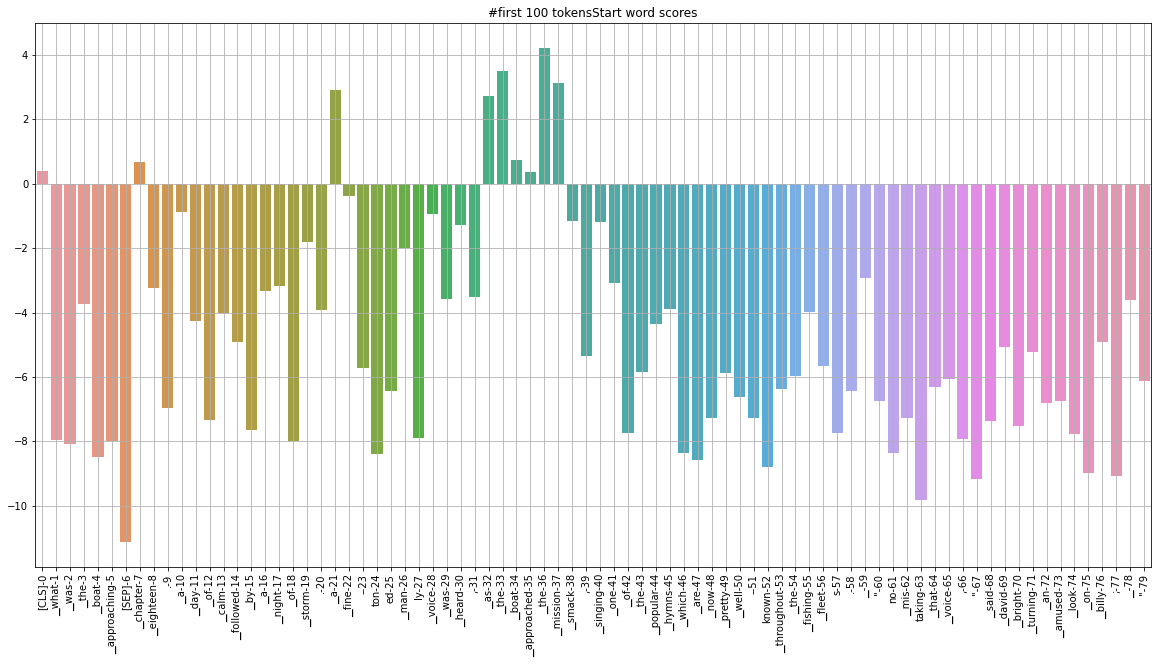

In [46]:

plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=start_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("#first 100 tokensStart word scores")
plt.show()

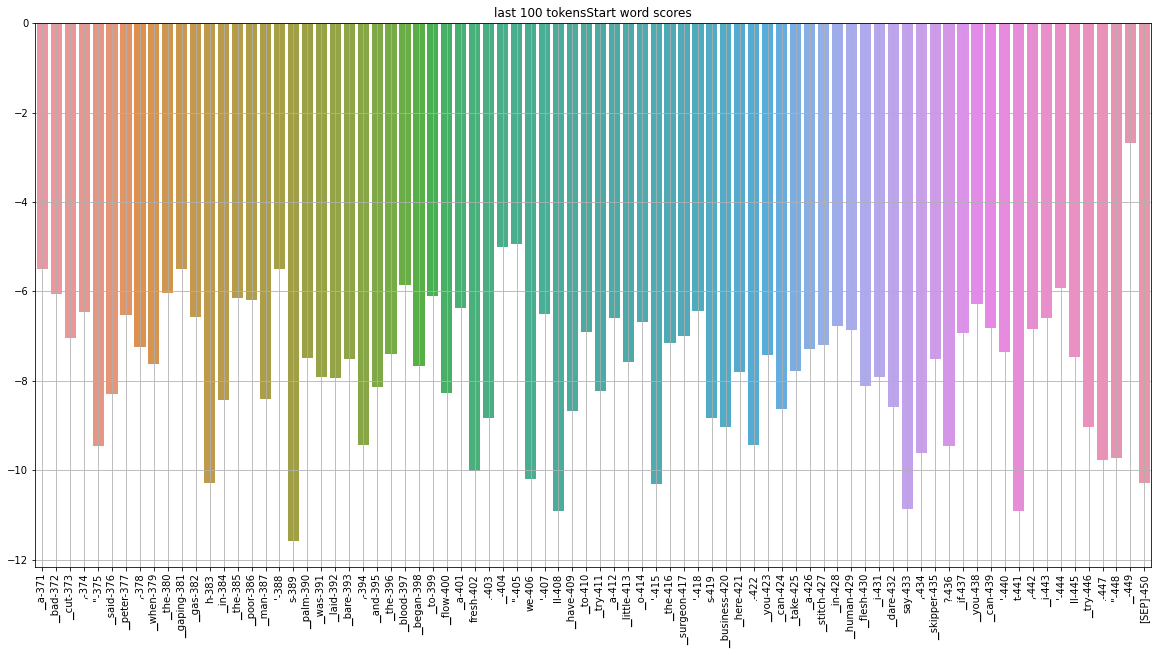

In [47]:

plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=start_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("last 100 tokensStart word scores")
plt.show()

In [48]:
answer = tokens[start]

for i in range(start+1, end+1):
    if tokens[i][0:2] == "##":
        answer += tokens[i][2:]
    else:
        answer += " " + tokens[i]

In [49]:
def questionanswer(question, text):
    
    #tokenize question and text in ids as a pair
    input_ids = tokenizer.encode(question, text)
    
    #string version of tokenized ids
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    
    #segment IDs
    #first occurence of [SEP] token
    sep_idx = input_ids.index(tokenizer.sep_token_id)

    #number of tokens in segment A - question
    segment_question = sep_idx+1

    #number of tokens in segment B - text
    segment_answer = len(input_ids) - segment_question
    
    #list of 0s and 1s
    segment_ids = [0]*segment_question + [1]*segment_answer
    
    assert len(segment_ids) == len(input_ids)
    
    #model output using input_ids and segment_ids
    output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
    
    #compile the answer
    start = torch.argmax(output.start_logits)
    end = torch.argmax(output.end_logits)

    if end >= start:
        answer = tokens[start]
        for i in range(start+1, end+1):
            if tokens[i][0:2] == "##":
                answer += tokens[i][2:]
            else:
                answer += " " + tokens[i]
                
    if answer.startswith("[CLS]"):
        answer = "Unable to find the answer to your question."
    print("\nAnswer:\n{}".format(answer.capitalize()))

In [50]:
text = """Elon Reeve Musk FRS (/ˈiːlɒn/; born June 28, 1971) is an entrepreneur, investor, and business magnate. He is the founder, CEO, and Chief Engineer at SpaceX; early-stage investor, CEO, and Product Architect of Tesla, Inc.; founder of The Boring Company; and co-founder of Neuralink and OpenAI. With an estimated net worth of around US$273 billion as of April 2022,[6] Musk is the wealthiest person in the world according to both the Bloomberg Billionaires Index and the Forbes real-time billionaires list.[7][8] Musk was born to a Canadian mother and White South African father, and raised in Pretoria, South Africa. He briefly attended the University of Pretoria before moving to Canada at age 17 to avoid conscription. He was enrolled at Queen's University and transferred to the University of Pennsylvania two years later, where he received a bachelor's degree in economics and physics. He moved to California in 1995 to attend Stanford University but decided instead to pursue a business career, co-founding the web software company Zip2 with his brother Kimbal. The startup was acquired by Compaq for $307 million in 1999. The same year, Musk co-founded online bank X.com, which merged with Confinity in 2000 to form PayPal. The company was bought by eBay in 2002 for $1.5 billion."""
question = "Where did elon musk attend?"
print(question)
questionanswer(question, text)

Where did elon musk attend?

Answer:
▁queen ' s ▁university ▁and ▁transferred ▁to ▁the ▁university ▁of ▁pennsylvania


# Test